# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18814187,
            "total_supply": 18814187,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 45624.0,
                    "volume_24h": 27093876866,
                    "market_cap": 859646661017,
                    "percentage_change_1h": -1.35839902889409,
                    "percentage_change_24h": 1.56305099149266,
                    "percentage_change_7d": -11.7465355771034,
                    "percent_change_1h": -1.35839902889409,
                    "percent_change_24h": 1.56305099149266,
                    "percent_change_7d": -11.7465355771034
                },
                "CAD": {
                    "price": 57860.3568,
                    "volume_24h": 34360454641.4612,
                    "

In [6]:
# Initialize variable for BTC price
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
print(btc_price)

45624.0


In [7]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117500458,
            "total_supply": 117500458,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3357.03,
                    "volume_24h": 17881563865,
                    "market_cap": 395011764744,
                    "percentage_change_1h": -2.16654482001562,
                    "percentage_change_24h": 3.34702706295616,
                    "percentage_change_7d": -15.0177968694818,
                    "percent_change_1h": -2.16654482001562,
                    "percent_change_24h": 3.34702706295616,
                    "percent_change_7d": -15.0177968694818
                },
                "CAD": {
                    "price": 4257.385446,
                    "volume_24h": 22677399293.593,
                  

In [8]:
# Initialize variable for ETH price
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

3357.03


In [9]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54748.80
The current value of your 5.3 ETH is $17792.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [12]:
# Format current date as ISO format
today = pd.Timestamp('2021-09-10', tz='America/Chicago').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
closing_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
closing_prices_df

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-09-10 00:00:00-04:00  115.99  116.01  115.7801  115.87  2767552  451.04   

                                                            
                             high     low  close    volume  
time                                                        
2021-09-10 00:00:00-04:00  451.49  445.31  445.5  75763259

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(closing_prices_df['AGG']['close'])
spy_close_price = float(closing_prices_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [14]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23174.00
The current value of your 50 SPY shares is $22275.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets_dict = {
    'amount': [round((my_btc_value + my_eth_value),2), round((my_agg_value + my_spy_value),2)]
}

# Create savings DataFrame
df_savings = pd.DataFrame(assets_dict, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,72541.06
shares,45449.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

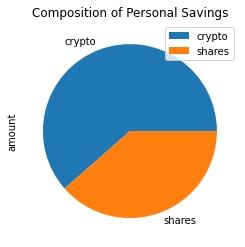

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()
print(savings)

amount    117990.06
dtype: float64


In [18]:
# Validate savings health
if savings.item() > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
elif savings.item() == emergency_fund:
    print(f'Congratulations!  You have achieved your goal of creating an emergency fund.')
elif savings.item() < emergency_fund:
    shortage = emergency_fund - savings.item()
    print(f'You are ${shortage} away from reaching your goal of having an emergency fund.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-09-10', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-09-10', tz='America/Chicago').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
historical_data_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
historical_data_df.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-09-20 00:00:00-04:00     NaN       NaN      NaN     NaN         NaN  
2017-09-21 00:00:00-04:00  249.89  249.9800  249.185  249.40  29220256.0  
2017-09-22 00:00:00-04:00  249.05  249.6300  249.020  249.42  31078666.0  
2017-09-25 00:00:00-04:00  249.14  249.5532  248.080  248.94  42826453.0  
2017-09-26 00:00:00-04:00  249.42  249.7000  248.805  249.05  36761208.0

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
MC_thirty = MCSimulation(
    portfolio_data = historical_data_df,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data
MC_thirty.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2017-09-20 00:00:00-04:00          NaN     NaN       NaN      NaN     NaN   
2017-09-21 00:00:00-04:00    -0.000182  249.89  249.9800  249.185  249.40   
2017-09-22 00:00:00-04:00     0.000957  249.05  249.6300  249.020  249.42   
2017-09-25 00:00:00-04:00     0.002186  249.14  249.5532  248.080  248.94   
2017-09-26 00:00:00-04:00    -0.000318  249.42  249.7000  248.805  249.05   

                                                    
                               volume daily_return  
time                                                
2017-09-20 00:00:00-04:00         NaN          NaN  
2017-09-21 00:00:00-04:00  29220256.0          NaN  
2017-09-22 00:00:00-04:00  31078666.0     0.000080  
2017-09-25 00:00:00-04:00  42826453.0    -0.001924  
2017-09-26 00:00:00-04:00  36761208.0     0.000442

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998079,1.017814,0.991393,1.005103,0.999451,0.998173,1.011655,0.990506,1.009284,1.012843,...,0.980670,0.996429,0.999991,0.998883,1.005973,1.010281,1.016560,1.003747,0.998338,1.001211
2,0.983230,1.020200,1.000417,1.001061,0.999313,0.998453,1.012439,0.989576,1.024548,1.010417,...,0.975896,0.978785,1.004321,1.000598,0.993967,1.025399,1.017967,1.010258,0.987537,0.998138
3,0.984340,1.014265,1.010870,0.999706,1.000605,1.000418,0.993340,1.000648,1.024585,1.015871,...,0.973618,0.987187,0.999039,1.010434,0.999141,1.013949,1.022517,1.015650,0.988621,1.000466
4,0.983923,1.009511,1.020293,0.992131,0.997305,1.015958,1.008989,0.997754,1.026663,1.019092,...,0.980558,0.978043,1.004246,1.005296,0.996683,1.020864,1.017683,1.000619,1.003216,1.012337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.065576,30.156994,15.669453,14.525259,25.615060,19.282977,36.784372,6.326806,23.769852,10.633527,...,7.645072,20.240280,10.337243,32.518172,34.373596,25.217666,10.984598,10.641887,4.773947,21.103518
7557,8.025751,30.211596,15.612777,14.405322,25.492062,19.159192,36.916980,6.415741,23.989450,10.596756,...,7.621626,20.251023,10.259988,32.356832,34.785186,25.178405,10.923217,10.695879,4.733419,20.963996
7558,7.879398,30.127272,15.460206,14.627800,25.535083,19.211366,37.039765,6.340910,23.848521,10.624070,...,7.610061,20.088080,10.453458,32.954873,34.692105,25.479138,10.841643,10.692623,4.773981,20.876051
7559,7.882243,29.935352,15.480773,14.840571,25.238163,19.033355,36.831060,6.421518,23.868653,10.711983,...,7.552221,20.094202,10.342262,33.441263,34.726516,25.232455,10.659732,10.727792,4.801728,20.722740


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

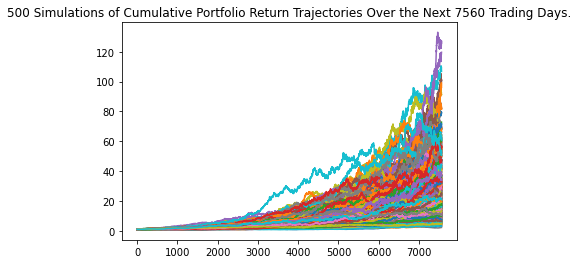

In [24]:
# Plot simulation outcomes
MC_thirty.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

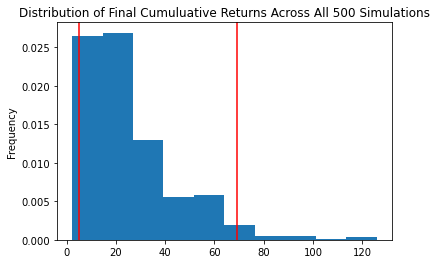

In [25]:
# Plot probability distribution and confidence intervals
MC_thirty.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirty.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             25.507649
std              18.769437
min               2.242605
25%              12.325066
50%              20.348655
75%              32.820363
max             125.763181
95% CI Lower      4.979124
95% CI Upper     69.078034
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of ${ci_lower:.2f} and ${ci_upper:.2f}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99582.47 and $1381560.68.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.0f} in the portfolio" 
      f"over the next 30 over the next years will end within in the range of ${ci_lower:.2f} and ${ci_upper:.2f}.")

There is a 95% chance that an initial investment of $30000 in the portfolioover the next 30 over the next years will end within in the range of $149373.71 and $2072341.02.


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
MC_five = MCSimulation(
    portfolio_data = historical_data_df,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995878,0.993771,1.010667,1.000021,1.002076,1.014853,1.011774,0.996050,0.996318,1.001205,...,0.997678,0.993510,1.004461,0.991117,1.008293,1.009300,0.993219,0.981337,0.999026,1.004541
2,1.001971,1.003593,1.027179,0.995881,0.995014,1.009258,1.020138,1.000437,0.993688,0.998534,...,0.980673,0.993193,1.006829,0.984251,1.013914,1.015247,0.999047,0.990857,0.979376,1.001100
3,1.002280,1.005225,1.026180,0.995460,1.005047,1.012176,1.011229,0.990613,0.989783,1.006002,...,0.981885,0.995855,1.005082,0.979136,1.007793,1.020234,1.004422,0.981926,0.980875,0.999812
4,1.009201,0.996225,1.020223,0.990191,0.998205,1.000049,1.012198,1.002778,0.994635,1.013308,...,0.969980,1.002186,0.993430,0.988859,1.023065,1.031721,1.007320,0.994255,0.977299,1.002039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.218100,1.836715,1.724887,1.747946,2.211760,2.184376,1.266485,1.474899,1.845830,2.307824,...,0.986113,1.830724,1.602164,1.635419,2.010945,3.220933,1.077734,2.859180,1.478222,2.727371
1257,2.185777,1.842097,1.714196,1.758186,2.205864,2.216554,1.267745,1.490701,1.854607,2.285458,...,0.999833,1.847842,1.605107,1.620580,2.025594,3.181098,1.077125,2.869560,1.472970,2.746400
1258,2.159152,1.848047,1.693106,1.771181,2.211003,2.214957,1.273585,1.503581,1.865474,2.288547,...,1.006452,1.856939,1.595449,1.621015,2.033715,3.179076,1.072158,2.863315,1.477255,2.744759
1259,2.169582,1.844278,1.681820,1.784626,2.187216,2.204959,1.270894,1.494665,1.857636,2.296664,...,0.998554,1.856338,1.596070,1.637120,2.055019,3.203966,1.068928,2.866089,1.472657,2.750077


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

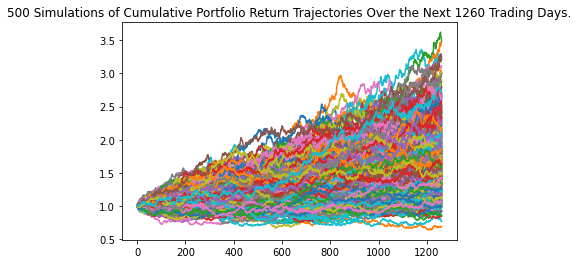

In [31]:
# Plot simulation outcomes
MC_five.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

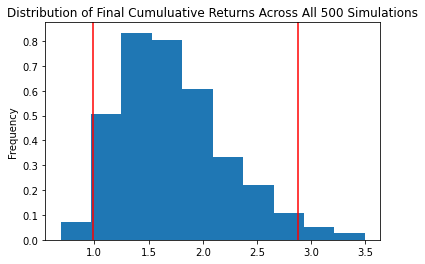

In [32]:
# Plot probability distribution and confidence intervals
MC_five.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_five.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.723307
std               0.494673
min               0.688174
25%               1.350494
50%               1.647915
75%               2.011160
max               3.494614
95% CI Lower      0.984464
95% CI Upper      2.878696
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary[8]*initial_investment,2)
ci_upper_five = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.0f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:.0f} and ${ci_upper_five:.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59068 and $172722


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
MC_ten = MCSimulation(
    portfolio_data = historical_data_df,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013954,0.995905,0.995586,1.000939,1.008970,1.007226,1.000269,1.006750,1.001030,1.001453,...,1.003119,0.988758,1.007948,0.996170,0.995905,1.009827,0.981702,1.006671,0.998839,0.995881
2,1.019121,0.987635,0.992521,0.999679,1.005098,1.000867,1.004559,1.008364,0.993499,0.991396,...,1.003264,0.987415,1.012836,1.005800,0.995172,1.020632,0.984059,1.009348,0.997274,1.003674
3,1.008524,0.988267,0.997434,1.012849,1.006232,0.992377,1.000536,1.033787,0.988753,0.997975,...,1.008251,1.006242,1.000967,1.000731,1.007396,1.027688,0.980746,1.018476,1.002381,0.996455
4,1.016477,0.983834,0.985953,1.009645,1.003968,0.988797,0.984418,1.017387,0.987894,0.988786,...,1.003642,1.003621,1.012572,1.008956,1.004369,1.030588,0.972682,1.025076,1.000734,0.999304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.113374,3.436144,3.492728,4.048832,8.127006,3.002228,1.523758,1.706288,5.689603,3.459477,...,4.038627,1.982783,2.717514,1.525976,1.650967,4.581212,3.641917,3.349263,5.621743,1.665501
2517,3.131118,3.442468,3.505007,4.081394,8.105859,2.947520,1.529355,1.718894,5.622108,3.454522,...,4.043660,1.958378,2.689732,1.530161,1.662602,4.559260,3.635863,3.310996,5.674314,1.661826
2518,3.164469,3.391964,3.551915,4.114967,8.086789,2.967340,1.546390,1.718673,5.714314,3.431171,...,4.059460,1.959971,2.680709,1.540382,1.646835,4.508559,3.586448,3.338038,5.696538,1.652040
2519,3.162713,3.365904,3.541726,4.149737,8.022244,2.972109,1.562582,1.720830,5.740485,3.442950,...,4.003792,1.938554,2.677786,1.516829,1.644764,4.464429,3.573409,3.333243,5.701942,1.681680


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

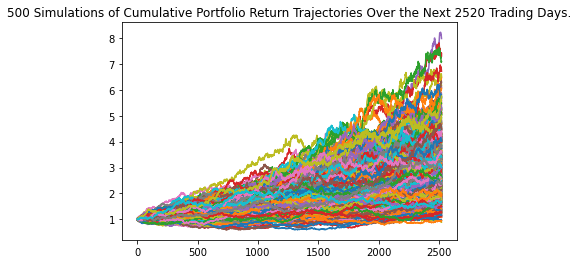

In [37]:
# Plot simulation outcomes
MC_ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

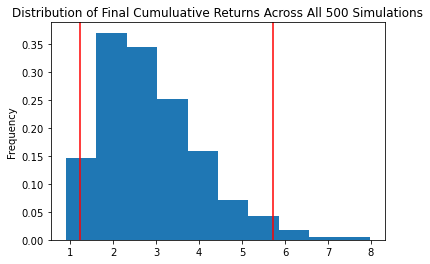

In [38]:
# Plot probability distribution and confidence intervals
MC_ten.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              2.894594
std               1.175056
min               0.898028
25%               2.030569
50%               2.673496
75%               3.491487
max               7.983408
95% CI Lower      1.221003
95% CI Upper      5.727381
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment - 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8]*initial_investment,2)
ci_upper_ten = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.0f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:.0f} and ${ci_upper_ten:.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73260 and $343643
